In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import graphviz

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
!pip install dmba

In [10]:
from dmba import classificationSummary

In [11]:
xlsx = pd.ExcelFile('UniversalBank.xlsx')

In [12]:
bank_df = pd.read_excel(xlsx, 'Data')

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [14]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1


In [15]:
bank_df.columns = bank_df.columns.str.replace(' ','')

In [16]:
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1


In [17]:
bank_df.PersonalLoan.value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [18]:
%matplotlib inline

Text(0, 0.5, 'Counts')

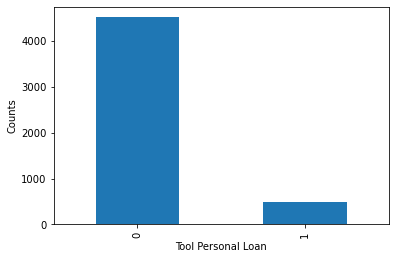

In [19]:
bank_df.PersonalLoan.value_counts().plot(kind='bar')
plt.xlabel('Tool Personal Loan')
plt.ylabel('Counts')

In [20]:
bank_df.drop(columns=['ID','ZIPCode'], inplace=True)

In [21]:
X = bank_df.drop(columns=['PersonalLoan'])

In [22]:
y = bank_df['PersonalLoan']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [24]:
fullClassTree = DecisionTreeClassifier(random_state=1)

In [25]:
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
y_predicted = fullClassTree.predict(X_test)

In [27]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
accuracy_score(y_test, y_predicted)

0.953

In [29]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


In [30]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9530)

       Prediction
Actual    0    1
     0 1771   36
     1   58  135


In [31]:
fullClassTree.tree_.max_depth

22

In [32]:
fullClassTree.tree_.node_count

265

In [33]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [34]:
export_graphviz(fullClassTree, out_file='fullClassTree.dot', 
                feature_names=X_train.columns)

In [35]:
smallClassTree = DecisionTreeClassifier(max_depth=2, min_samples_split=100,
                                       random_state=1)

In [36]:
smallClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [37]:
smallClassTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=100, random_state=1)

In [38]:
smallClassTree.tree_.max_depth

2

In [39]:
smallClassTree.tree_.node_count

7

In [40]:
export_graphviz(smallClassTree, out_file='smallClassTree.dot', 
                feature_names=X_train.columns)

In [41]:
classificationSummary(y_train, smallClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.9463)

       Prediction
Actual    0    1
     0 2698   15
     1  146  141


In [42]:
classificationSummary(y_test, smallClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9445)

       Prediction
Actual    0    1
     0 1799    8
     1  103   90


In [46]:
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [47]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
                         param_grid, cv=5)

In [48]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]})

In [49]:
print('Initial score: ', gridSearch.best_score_)

Initial score:  0.9503333333333333


In [50]:
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 10, 'min_samples_split': 50}


In [51]:
param_grid = {
    'max_depth': list(range(2,16)),
    'min_samples_split': list(range(30,69))
}

In [52]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
                         param_grid, cv=5)

In [53]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_samples_split': [30, 31, 32, 33, 34, 35, 36, 37,
                                               38, 39, 40, 41, 42, 43, 44, 45,
                                               46, 47, 48, 49, 50, 51, 52, 53,
                                               54, 55, 56, 57, 58, 59, ...]})

In [54]:
print('Improved score: ', gridSearch.best_score_)

Improved score:  0.9533333333333334


In [55]:
print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 4, 'min_samples_split': 39}


In [56]:
bestClassTree = gridSearch.best_estimator_

In [57]:
classificationSummary(y_train, bestClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.9567)

       Prediction
Actual    0    1
     0 2706    7
     1  123  164


In [58]:
classificationSummary(y_test, bestClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9540)

       Prediction
Actual    0    1
     0 1802    5
     1   87  106
